In [13]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

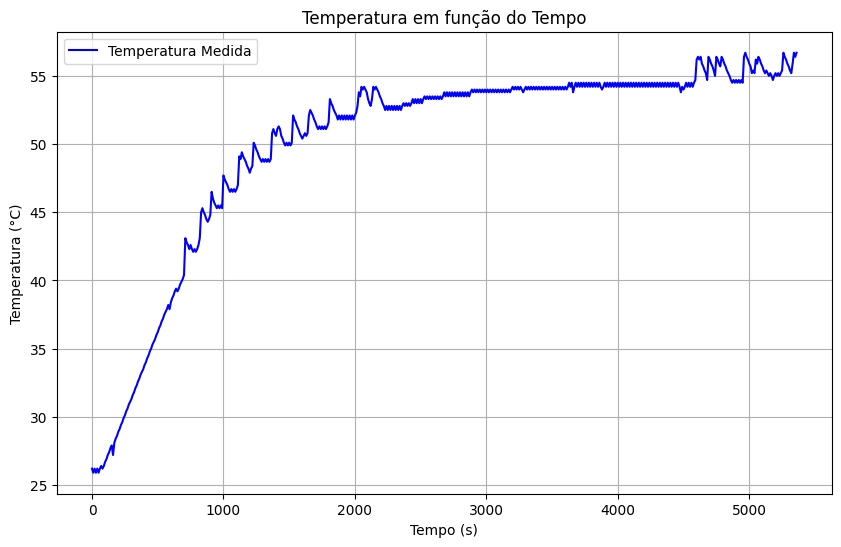

In [14]:
data = pd.read_csv(os.path.join(".", "dados_aquecedor.csv"))
temp = data["Unit"].to_numpy()
time = 10 * np.arange(len(temp))

plt.figure(figsize=(10, 6))
plt.plot(time , temp, label="Temperatura Medida", color="blue")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo")
plt.legend()
plt.grid()



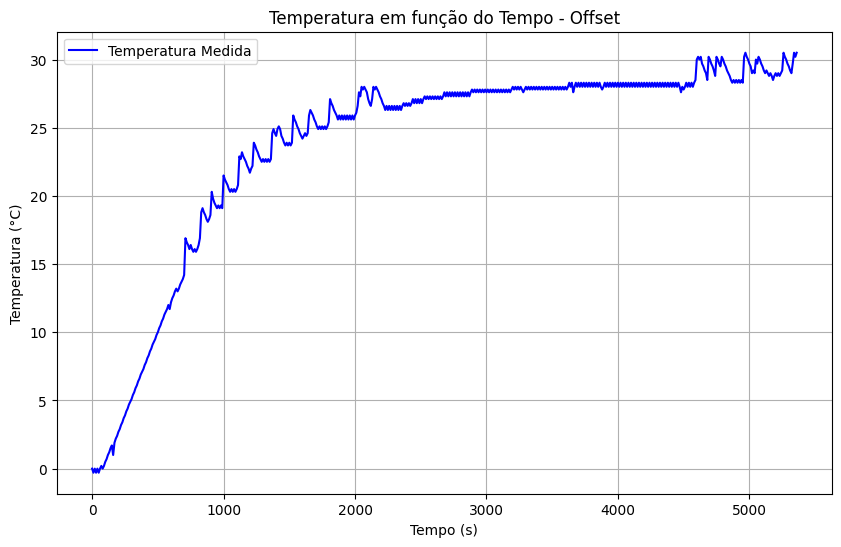

In [15]:
# OFFSET
temp = temp - temp[0]

plt.figure(figsize=(10, 6))
plt.plot(time , temp, label="Temperatura Medida", color="blue")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo - Offset")
plt.legend()
plt.grid()


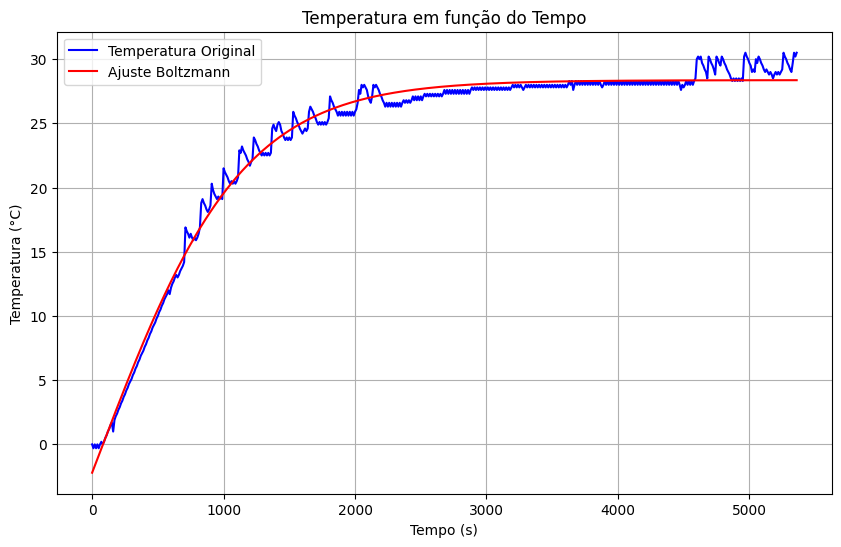

Parâmetros ajustados:
A1 (Temperatura inicial): -31.19
A2 (Temperatura final): 28.36
x0 (Ponto de inflexão): 29.59
dx (Taxa de transição): 554.20


In [16]:
# Função sigmoidal de Boltzmann
# util para representar fenômenos que apresentam uma curva em "S"
def boltzmann(x, A1, A2, x0, dx):
    return A1 + (A2 - A1) / (1 + np.exp((x0 - x) / dx))

p0 = [26, 54, 10, 100]  # Chutes iniciais para os parâmetros (A1, A2, x0, dx)
popt, _ = curve_fit(boltzmann, time, temp, p0=p0)
temp_fit = boltzmann(time, *popt)

data["Unit Fit"] = temp_fit
data.to_csv("ajustado.csv", index=False)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(time, temp, label="Temperatura Original", color="blue")
plt.plot(time, temp_fit, label="Ajuste Boltzmann", color="red")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo")
plt.legend()
plt.grid()
plt.savefig("temperatura_vs_tempo.png")
plt.show()

print("Parâmetros ajustados:")
print(f"A1 (Temperatura inicial): {popt[0]:.2f}")
print(f"A2 (Temperatura final): {popt[1]:.2f}")
print(f"x0 (Ponto de inflexão): {popt[2]:.2f}")
print(f"dx (Taxa de transição): {popt[3]:.2f}")

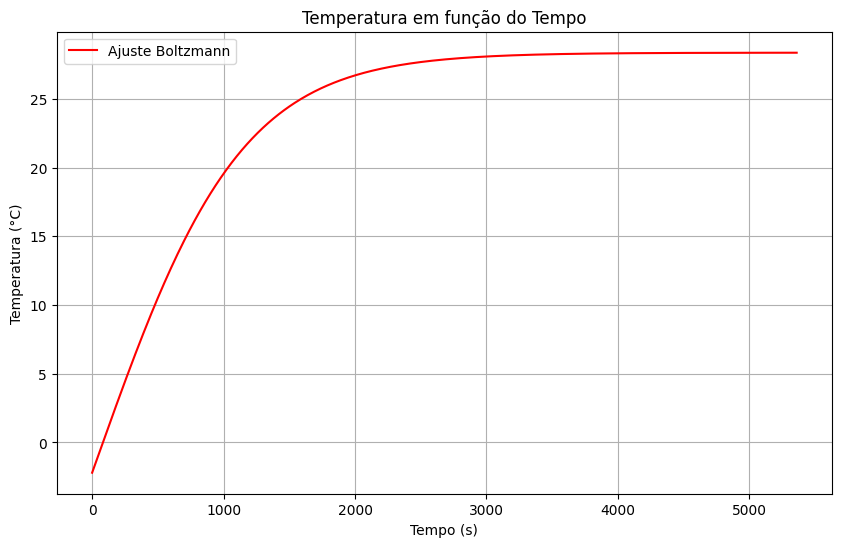

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(time, temp_fit, label="Ajuste Boltzmann", color="red")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura em função do Tempo")
plt.legend()
plt.grid()
plt.show()